In [ ]:
!pip install transformers
!pip install torch
!pip install scikit-learn
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install transformers datasets torch scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel

 # 1. Load dataset hasil preprocessing
df = pd.read_csv('Tokopedia_preprocessed.csv')

 # 2. Inisialisasi tokenizer & model IndoBERT yang accessible
MODEL_NAME = 'indobenchmark/indobert-base-p2'
tokenizer  = AutoTokenizer.from_pretrained(MODEL_NAME)
model      = AutoModel.from_pretrained(MODEL_NAME)

 # 3. Contoh 5 teks pertama
texts = df['clean_content'].astype(str).tolist()[:5]

 # 4. Tokenisasi + padding/truncation
encoded = tokenizer(
    texts,
    padding      = True,
    truncation   = True,
    max_length   = 128,
    return_tensors = 'pt'
)

 # 5. Ekstrak embedding tanpa grad
with torch.no_grad():
    outputs = model(
        input_ids      = encoded['input_ids'],
        attention_mask = encoded['attention_mask']
    )

 # 6. Ambil vektor CLS (posisi 0)
cls_embeddings = outputs.last_hidden_state[:, 0, :]  # (5, 768)

print("Shape CLS embeddings:", cls_embeddings.shape)
print("Contoh 10 dim pertama vektor [CLS]:\n", cls_embeddings[0][:10])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Shape CLS embeddings: torch.Size([5, 768])
Contoh 10 dim pertama vektor [CLS]:
 tensor([ 1.3185,  2.1275,  0.6206,  0.9712,  2.1493, -1.9557,  0.2906,  0.2253,
         0.4082,  1.4873])


Epoch 1 — Loss: 1.4840 — Sent Acc: 0.5687 — Asp Acc: 0.7900
Epoch 2 — Loss: 1.1181 — Sent Acc: 0.6695 — Asp Acc: 0.8465
Epoch 3 — Loss: 0.9718 — Sent Acc: 0.7229 — Asp Acc: 0.8739
Epoch 4 — Loss: 0.8546 — Sent Acc: 0.7591 — Asp Acc: 0.8912
Epoch 5 — Loss: 0.7946 — Sent Acc: 0.7770 — Asp Acc: 0.9012
Epoch 6 — Loss: 0.7268 — Sent Acc: 0.7991 — Asp Acc: 0.9093
Epoch 7 — Loss: 0.6581 — Sent Acc: 0.8140 — Asp Acc: 0.9205
Epoch 8 — Loss: 0.6066 — Sent Acc: 0.8331 — Asp Acc: 0.9260
Epoch 9 — Loss: 0.5715 — Sent Acc: 0.8462 — Asp Acc: 0.9317
Epoch 10 — Loss: 0.5483 — Sent Acc: 0.8598 — Asp Acc: 0.9324


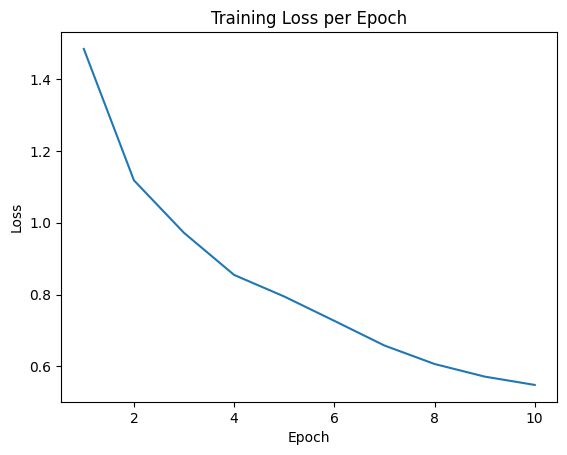

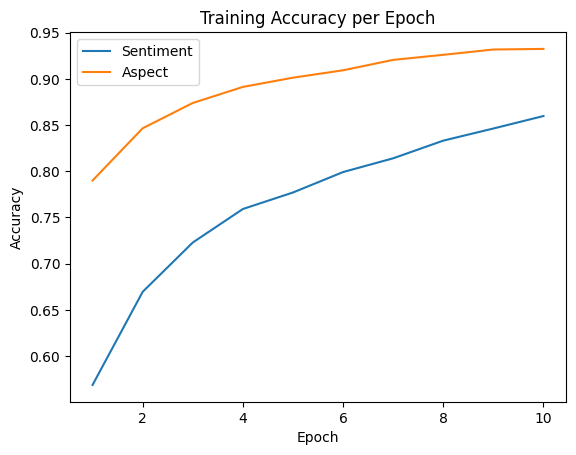

=== Sentiment Classification Report ===
              precision    recall  f1-score   support

      Netral       0.75      0.73      0.74       561
     Positif       0.86      0.86      0.86       767
     Negatif       0.75      0.76      0.76       672

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

=== Aspect Classification Report ===
              precision    recall  f1-score   support

   Pelayanan       0.90      0.95      0.92       796
    Kualitas       0.93      0.83      0.88       608
       Harga       0.90      0.94      0.92       596

    accuracy                           0.91      2000
   macro avg       0.91      0.90      0.91      2000
weighted avg       0.91      0.91      0.91      2000



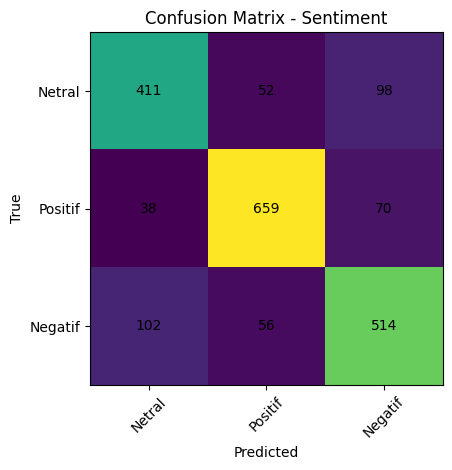

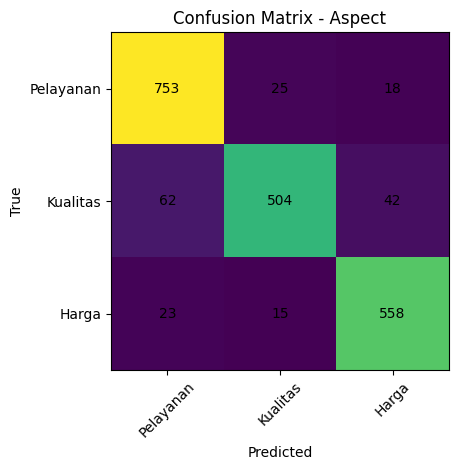

=== Accuracy per class: Sentiment ===
  Netral  : 73.26%
  Positif : 85.92%
  Negatif : 76.49%

=== Accuracy per class: Aspect ===
  Pelayanan: 94.60%
  Kualitas: 82.89%
  Harga   : 93.62%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# === Map label sentimen dan aspek ===
sent_map   = {'Netral': 0, 'Positif': 1, 'Negatif': 2}
aspect_map = {'Pelayanan': 0, 'Kualitas': 1, 'Harga': 2}
inv_sent_map   = {v:k for k,v in sent_map.items()}
inv_aspect_map = {v:k for k,v in aspect_map.items()}

# 1. Dataset class
class TokopediaDualDataset(Dataset):
    def __init__(self, texts, sent_labels, aspect_labels, tokenizer, max_length=128):
        self.texts = texts
        self.sent_labels = sent_labels
        self.aspect_labels = aspect_labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        sent_label = self.sent_labels[idx]
        aspect_label = self.aspect_labels[idx]
        enc = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': enc['input_ids'].squeeze(),
            'attention_mask': enc['attention_mask'].squeeze(),
            'sentiment': torch.tensor(sent_label, dtype=torch.long),
            'aspect': torch.tensor(aspect_label, dtype=torch.long)
        }

# 2. Model BERT + CNN (dual output)
class BertCNNMultiTask(nn.Module):
    def __init__(self, model_name, num_sent_classes=3, num_aspect_classes=3):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        for p in self.bert.parameters():
            p.requires_grad = False  # freeze BERT
        hidden_size = self.bert.config.hidden_size
        self.conv = nn.Conv1d(in_channels=hidden_size, out_channels=300, kernel_size=5)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.dropout = nn.Dropout(0.5)
        self.sent_classifier = nn.Linear(300, num_sent_classes)
        self.aspect_classifier = nn.Linear(300, num_aspect_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        x = outputs.last_hidden_state         # (B, L, H)
        x = x.permute(0, 2, 1)                # (B, H, L)
        x = torch.relu(self.conv(x))          # (B, 300, L-4)
        x = self.pool(x).squeeze(-1)          # (B, 300)
        x = self.dropout(x)
        sent_logits = self.sent_classifier(x)
        aspect_logits = self.aspect_classifier(x)
        return sent_logits, aspect_logits

# 3. Persiapan tokenizer, data, dataloader
tokenizer = AutoTokenizer.from_pretrained('indobenchmark/indobert-base-p2')
df = pd.read_csv('Tokopedia_preprocessed.csv')
sent_labels   = [sent_map[s]   for s in df['Sentimen']]
aspect_labels = [aspect_map[a] for a in df['Aspek']]

train_texts, test_texts, train_sent, test_sent, train_aspect, test_aspect = train_test_split(
    df['clean_content'].tolist(), sent_labels, aspect_labels,
    test_size=0.2, random_state=42, stratify=sent_labels
)

train_dataset = TokopediaDualDataset(train_texts, train_sent, train_aspect, tokenizer)
test_dataset  = TokopediaDualDataset(test_texts,  test_sent,  test_aspect,  tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=32)

# 4. Inisialisasi model, loss, optimizer
device    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model     = BertCNNMultiTask('indobenchmark/indobert-base-p2').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 5. Training loop dengan pencatatan metrik
num_epochs = 10
train_losses = []
train_sent_acc = []
train_aspect_acc = []

for epoch in range(1, num_epochs+1):
    model.train()
    total_loss, correct_sent, correct_aspect = 0, 0, 0

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sent_labels = batch['sentiment'].to(device)
        aspect_labels = batch['aspect'].to(device)

        optimizer.zero_grad()
        sent_logits, aspect_logits = model(input_ids, attention_mask)
        loss = criterion(sent_logits, sent_labels) + criterion(aspect_logits, aspect_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * input_ids.size(0)
        correct_sent   += (sent_logits.argmax(1)   == sent_labels).sum().item()
        correct_aspect += (aspect_logits.argmax(1) == aspect_labels).sum().item()

    avg_loss = total_loss / len(train_dataset)
    sent_acc = correct_sent   / len(train_dataset)
    aspect_acc = correct_aspect / len(train_dataset)

    train_losses.append(avg_loss)
    train_sent_acc.append(sent_acc)
    train_aspect_acc.append(aspect_acc)

    print(f"Epoch {epoch} — Loss: {avg_loss:.4f} — Sent Acc: {sent_acc:.4f} — Asp Acc: {aspect_acc:.4f}")

# 6. Plotting grafik training
epochs = list(range(1, num_epochs+1))

plt.figure()
plt.plot(epochs, train_losses)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(epochs, train_sent_acc, label="Sentiment")
plt.plot(epochs, train_aspect_acc, label="Aspect")
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 7. Evaluasi pada test set
model.eval()
all_sent_preds = []
all_sent_trues = []
all_asp_preds  = []
all_asp_trues  = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sent_labels = batch['sentiment'].to(device)
        aspect_labels = batch['aspect'].to(device)

        sent_logits, aspect_logits = model(input_ids, attention_mask)
        all_sent_preds.extend(sent_logits.argmax(1).cpu().tolist())
        all_sent_trues.extend(sent_labels.cpu().tolist())
        all_asp_preds.extend(aspect_logits.argmax(1).cpu().tolist())
        all_asp_trues.extend(aspect_labels.cpu().tolist())

# 8. Classification report & confusion matrix untuk setiap tugas
print("=== Sentiment Classification Report ===")
print(classification_report(all_sent_trues, all_sent_preds, target_names=[inv_sent_map[i] for i in range(3)]))

print("=== Aspect Classification Report ===")
print(classification_report(all_asp_trues, all_asp_preds, target_names=[inv_aspect_map[i] for i in range(3)]))

# 9. Plot confusion matrices
def plot_cm(trues, preds, labels, title):
    cm = confusion_matrix(trues, preds)
    plt.figure()
    plt.imshow(cm)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(np.arange(len(labels)), labels, rotation=45)
    plt.yticks(np.arange(len(labels)), labels)
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.tight_layout()
    plt.show()

plot_cm(all_sent_trues, all_sent_preds,
        [inv_sent_map[i] for i in range(3)],
        "Confusion Matrix - Sentiment")

plot_cm(all_asp_trues, all_asp_preds,
        [inv_aspect_map[i] for i in range(3)],
        "Confusion Matrix - Aspect")

# 8.1. Hitung confusion matrix ulang kalau perlu
cm_sent = confusion_matrix(all_sent_trues, all_sent_preds)
cm_asp  = confusion_matrix(all_asp_trues,  all_asp_preds)

# 8.2. Akurasi per kelas = diagonal(cm) / jumlah aktual per kelas
acc_per_sent = cm_sent.diagonal() / cm_sent.sum(axis=1)
acc_per_asp  = cm_asp.diagonal()  / cm_asp.sum(axis=1)

# 8.3. Tampilkan
print("=== Accuracy per class: Sentiment ===")
for i, acc in enumerate(acc_per_sent):
    print(f"  {inv_sent_map[i]:<8s}: {acc*100:>5.2f}%")

print("\n=== Accuracy per class: Aspect ===")
for i, acc in enumerate(acc_per_asp):
    print(f"  {inv_aspect_map[i]:<8s}: {acc*100:>5.2f}%")
